In [1]:
pip install pandas numpy matplotlib scikit-learn keras tensorflow 


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
pip install seaborn


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import seaborn as sns

In [5]:
data=pd.read_csv(r'./diabetes.csv')

In [6]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

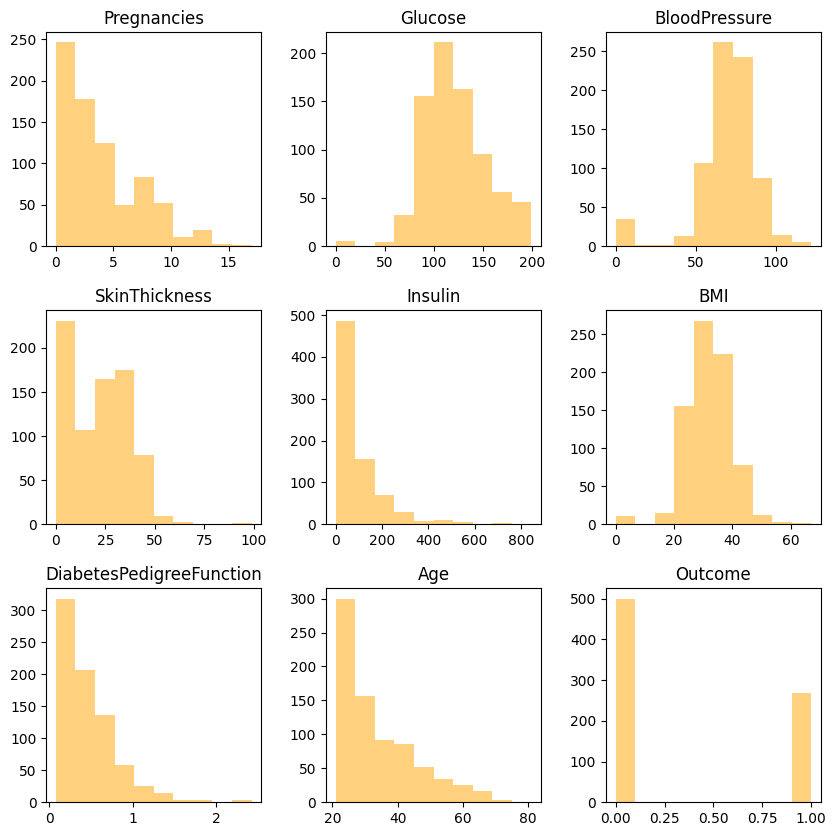

In [7]:
data.hist(figsize=(10,10),color='orange',alpha=0.5, grid=False)

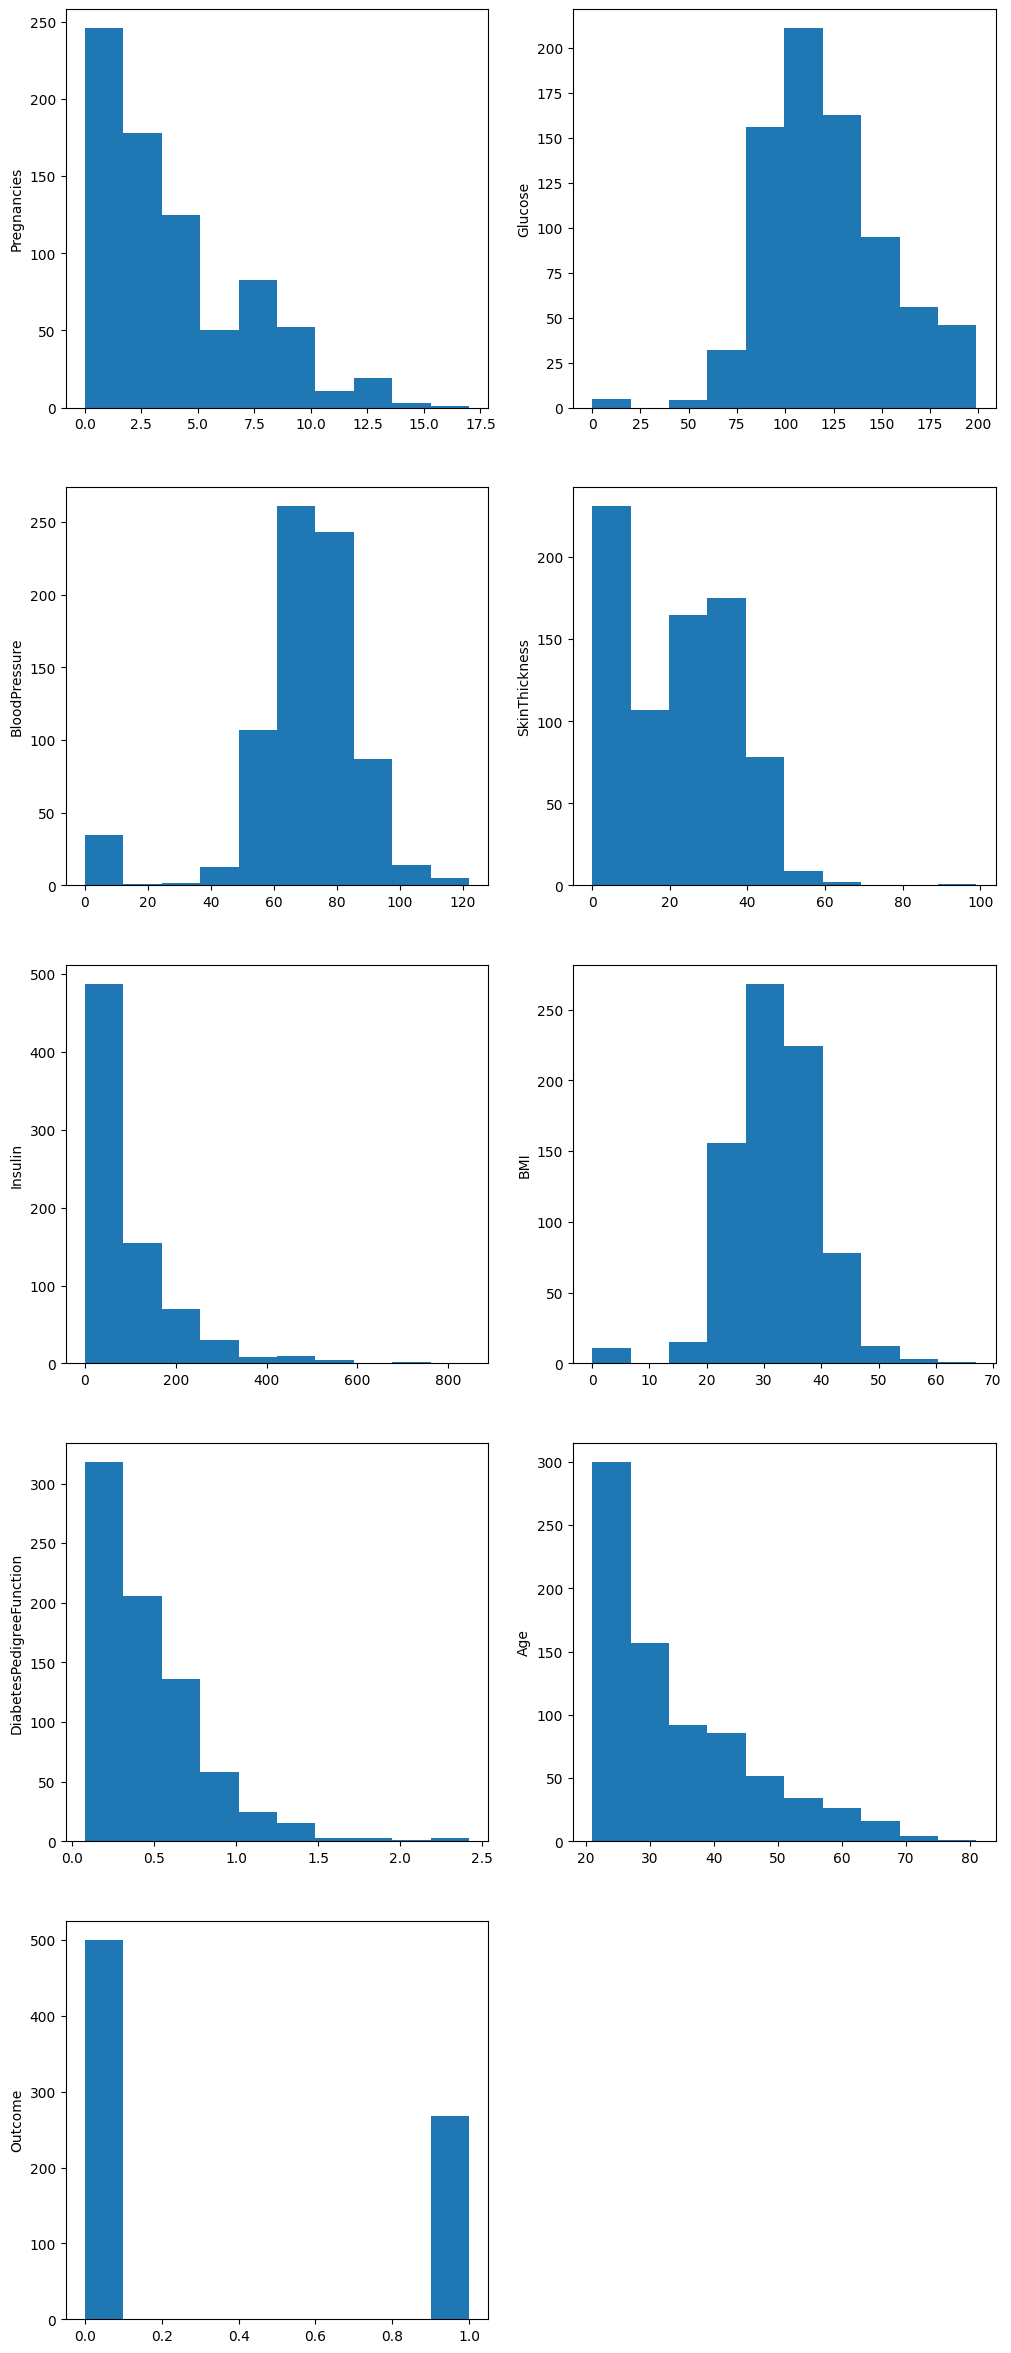

In [8]:
for i,feature in enumerate(data.columns):
    plt.subplot(5,2,i+1)
    data[feature].plot(figsize=(12,30), kind='hist')
    plt.ylabel(feature)

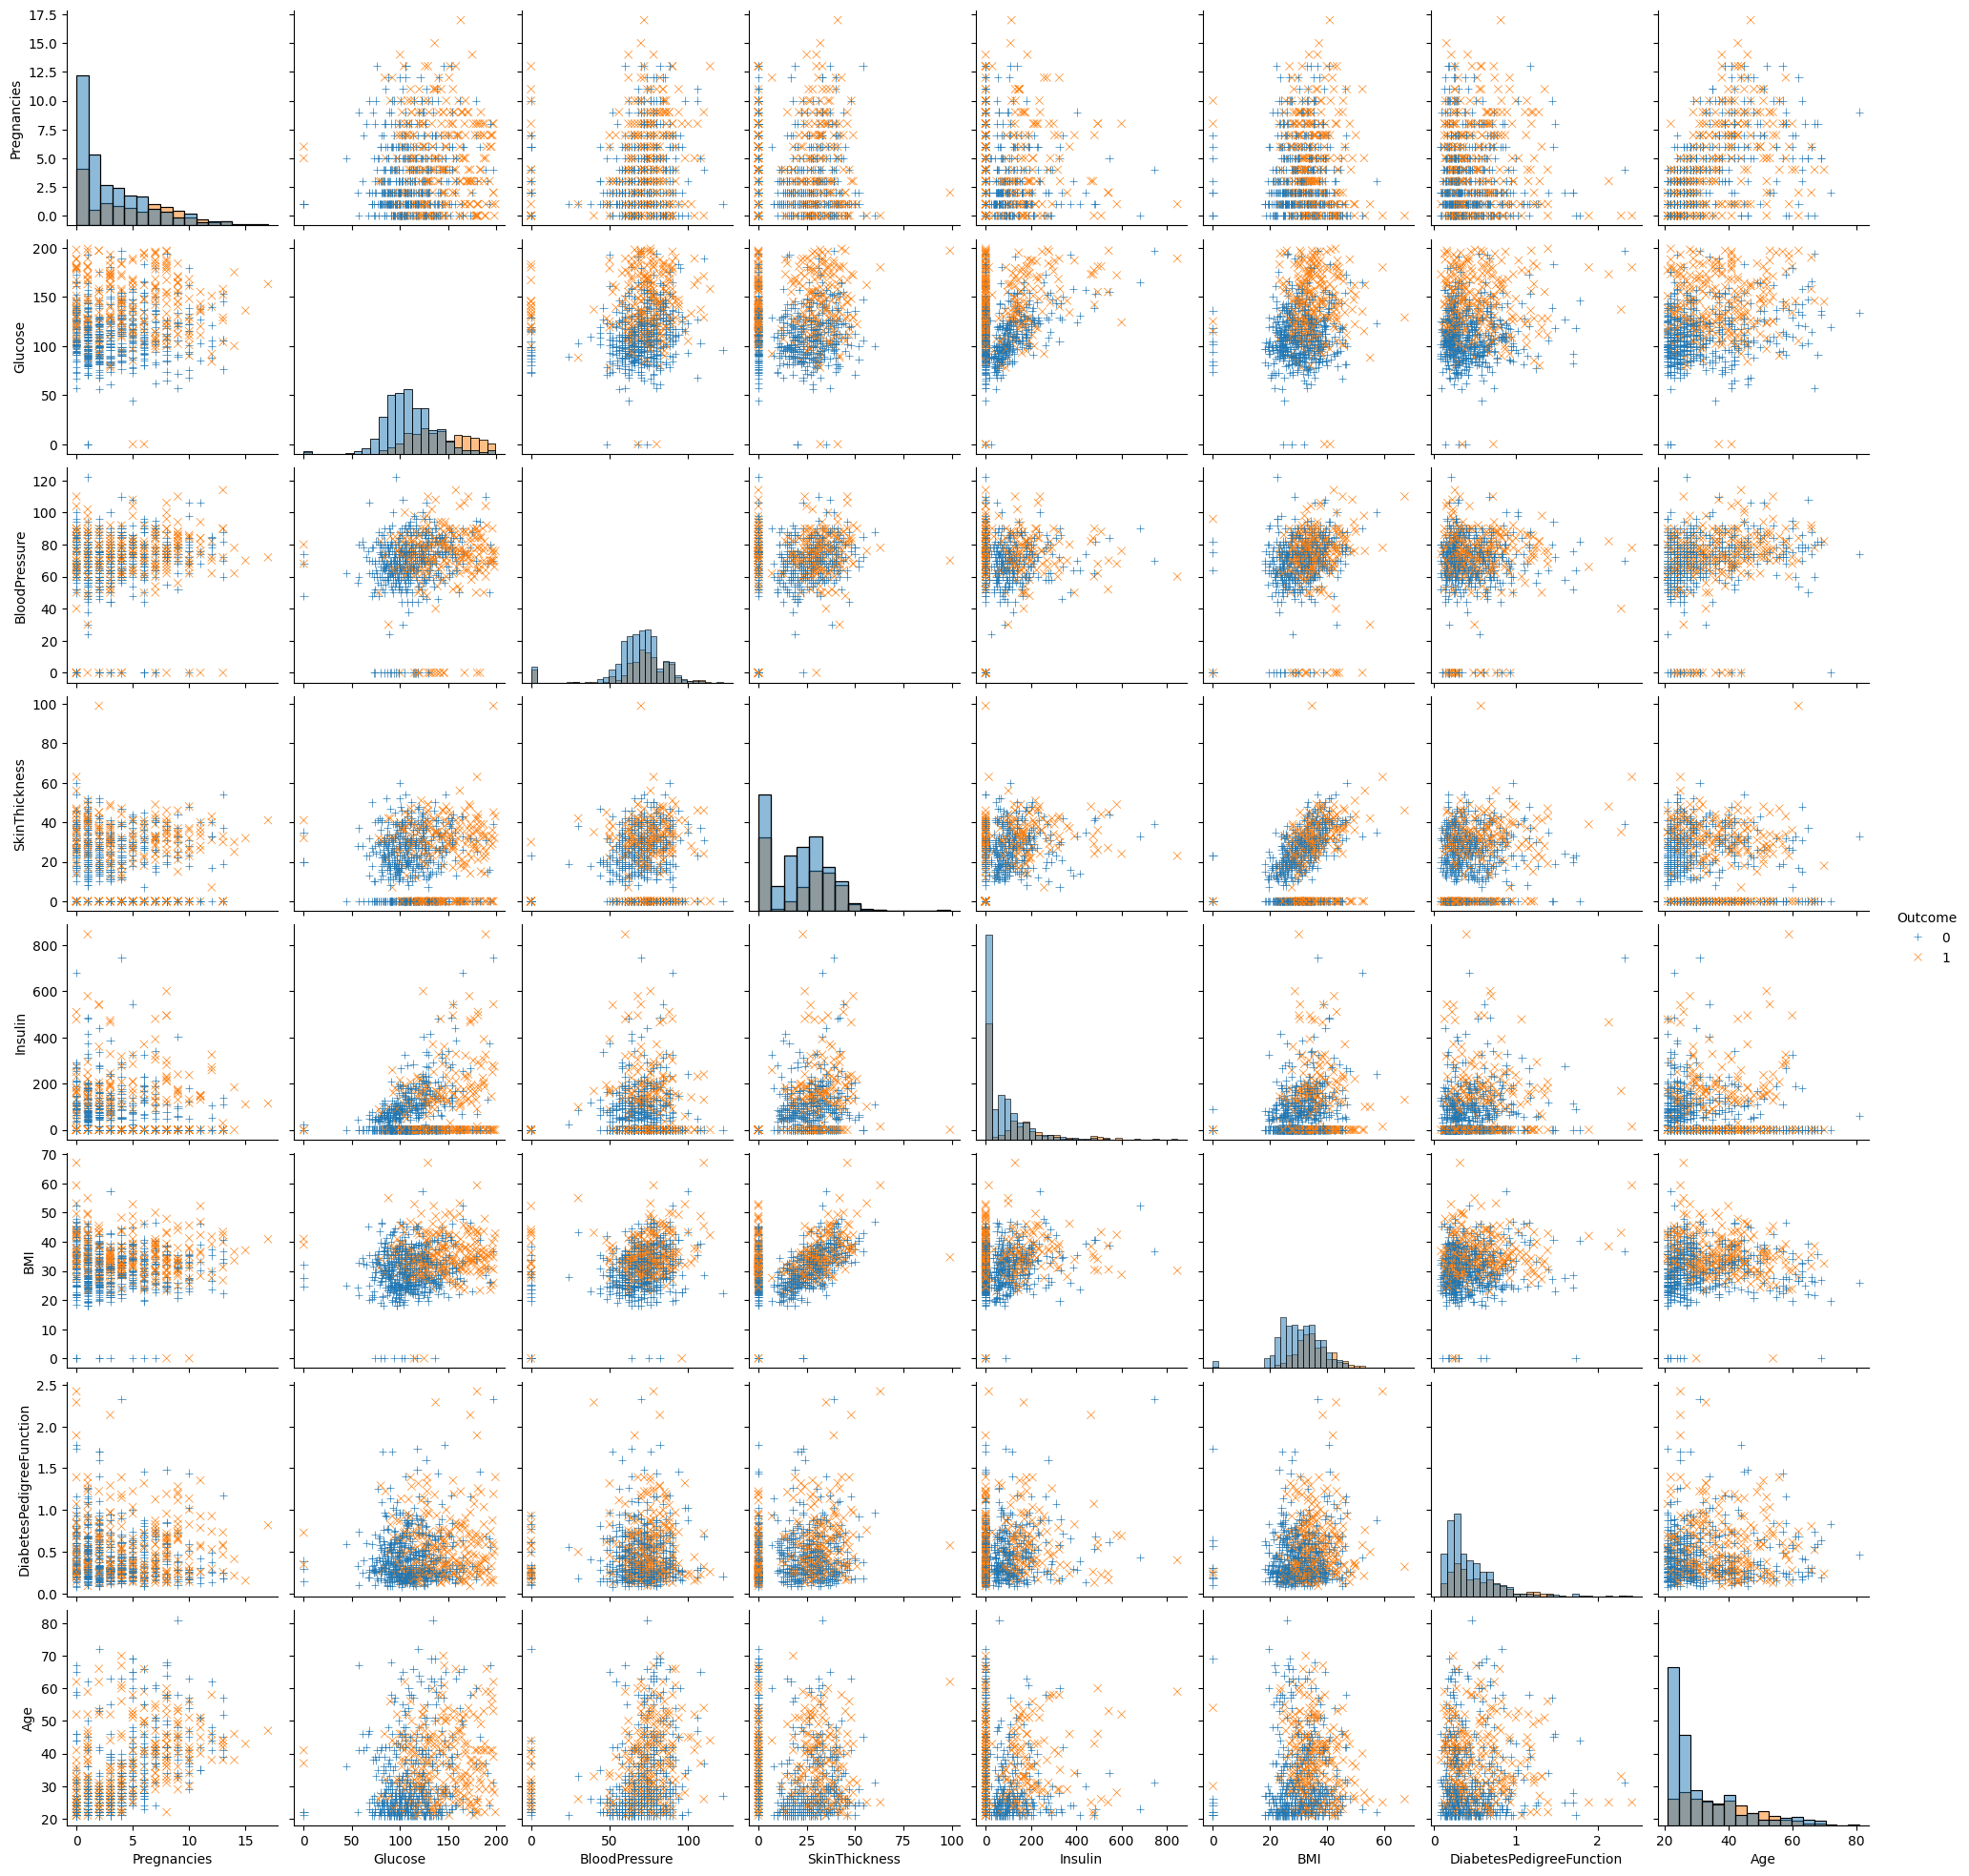

In [9]:
sns.pairplot(data,markers=['+','x'],hue='Outcome',diag_kind='hist')

<Axes: >

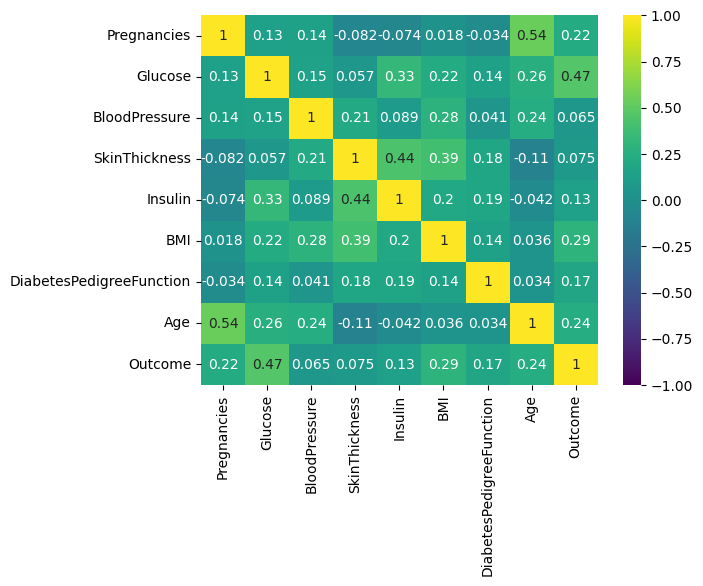

In [10]:
sns.heatmap(data.corr(),cmap='viridis',vmin=-1, vmax=1, annot=True)

In [11]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=23)

In [13]:
import tensorflow as tf
from tensorflow.keras import layers
from keras.layers import Dense,Input
from keras.models import Model, Sequential
from keras.optimizers import Adam

In [85]:
model=Sequential([
    Input(shape=(8,)),  #Explicit input layer
    Dense(units=2,activation='sigmoid'),
    Dense(units=1,activation='sigmoid')
])

In [86]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 2)                   │              18 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21 (84.00 B)

 Trainable params: 21 (84.00 B)

 Non-trainable params: 0 (0.00 B)

In [111]:
model.compile(optimizer=Adam(learning_rate=0.03),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [112]:
from sklearn.preprocessing import StandardScaler

In [113]:
scaler= StandardScaler()  
x_train=scaler.fit_transform(x_train)

In [114]:
model.fit(x_train,y_train)

17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6817 - loss: 0.5508


In [115]:
y_pred_new=model.predict(x_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [116]:
y_pred_labels = np.where(y_pred_new >= 0.5, 1, 0)

In [117]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [118]:
print(confusion_matrix(y_test,y_pred_labels))

[[148   0]
 [ 83   0]]


In [119]:
print(accuracy_score(y_test,y_pred_labels))

0.6406926406926406


In [101]:
y_test.value_counts()

Outcome
0    148
1     83
Name: count, dtype: int64